In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [3]:
df_test= pd.read_csv('Titanic_test.csv')
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train= pd.read_csv('Titanic_train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_submission = pd.read_csv('gender_submission.csv')
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# Basic information
print("Training Data Info:")
print(df_train.info())
print("\nTesting Data Info:")
print(df_test.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [6]:
# Preprocessing for the train set

In [7]:
# Impute missing 'Age' values with the median
imputer_age_train = SimpleImputer(strategy='median')
df_train['Age'] = imputer_age_train.fit_transform(df_train[['Age']])



In [8]:
# Impute missing 'Embarked' values with the most frequent value
imputer_embarked_train = SimpleImputer(strategy='most_frequent')
df_train['Embarked'] = imputer_embarked_train.fit_transform(df_train[['Embarked']])[:, 0] 

In [36]:
# Handle missing 'Cabin' values by filling with 'Unknown'
df_train['Cabin'].fillna('Unknown', inplace=True)

C:\Users\udits\AppData\Local\Temp\ipykernel_8556\898489372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Cabin'].fillna('Unknown', inplace=True)


In [10]:
# Encode categorical variables
label_encoder_sex_train = LabelEncoder()
df_train['Sex'] = label_encoder_sex_train.fit_transform(df_train['Sex'])
label_encoder_embarked_train = LabelEncoder()
df_train['Embarked'] = label_encoder_embarked_train.fit_transform(df_train['Embarked'])


In [11]:
# Extract the first letter of 'Cabin' (if not 'Unknown')
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
label_encoder_cabin_train = LabelEncoder()
df_train['Cabin'] = label_encoder_cabin_train.fit_transform(df_train['Cabin'])

In [12]:
# Feature Engineering (Example: Family Size)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [13]:
# Drop unnecessary columns
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [14]:
# Prepare the training data
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']


In [15]:
# Summary statistics
print("\nTraining Data Description:")
print(df_train.describe())



Training Data Description:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare       Cabin    Embarked  FamilySize  
count  891.000000  891.000000  891.000000  891.000000  
mean    32.204208    6.716049    1.536476    1.904602  
std     49.693429    2.460739    0.791503    1.613459  
min      0.000000 

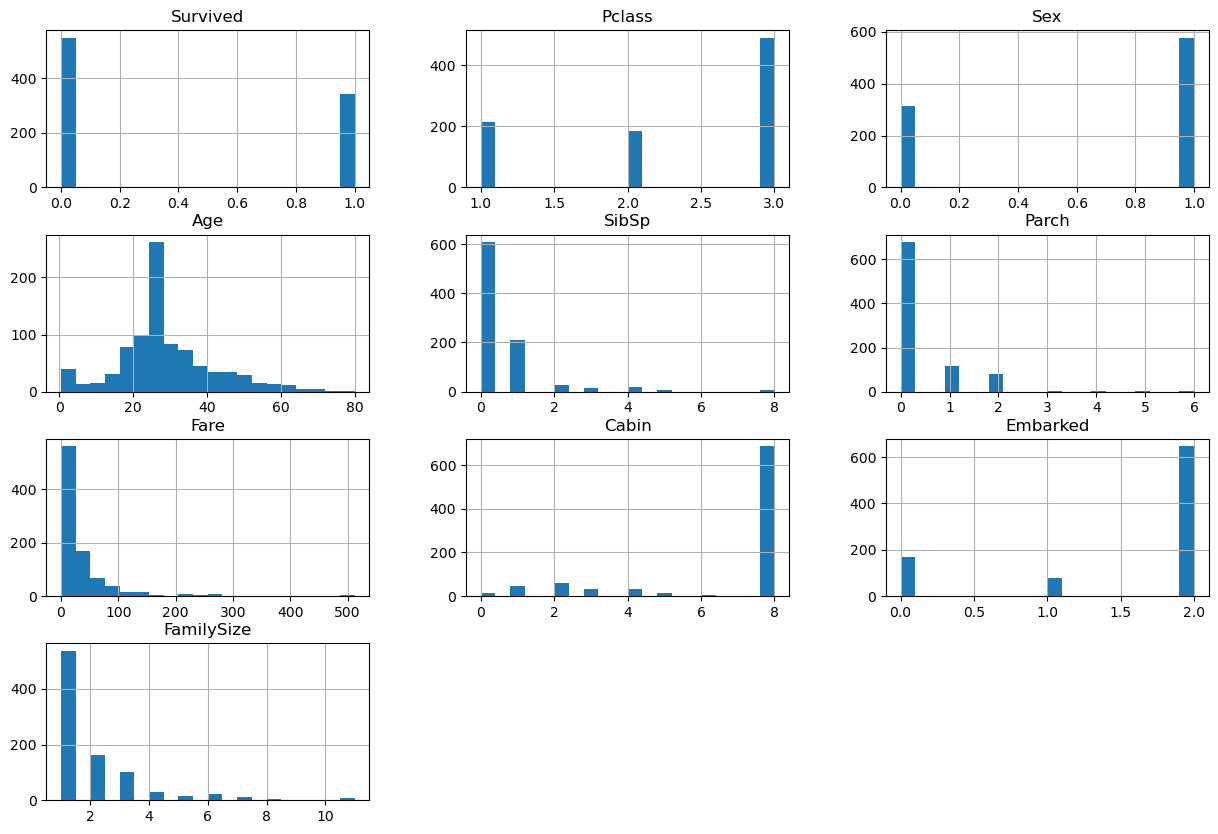

In [16]:
# Histograms for numerical features
df_train.hist(bins=20, figsize=(15, 10))
plt.show()

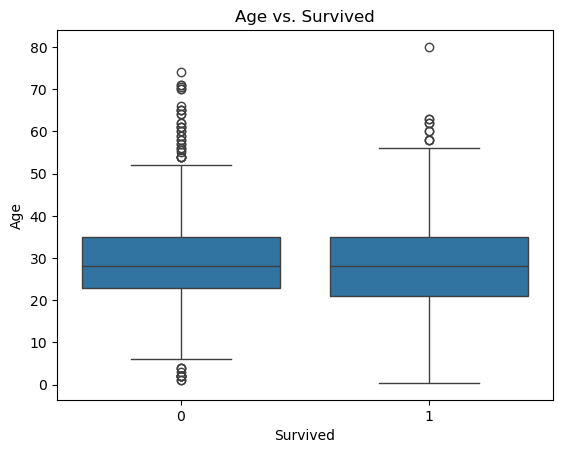

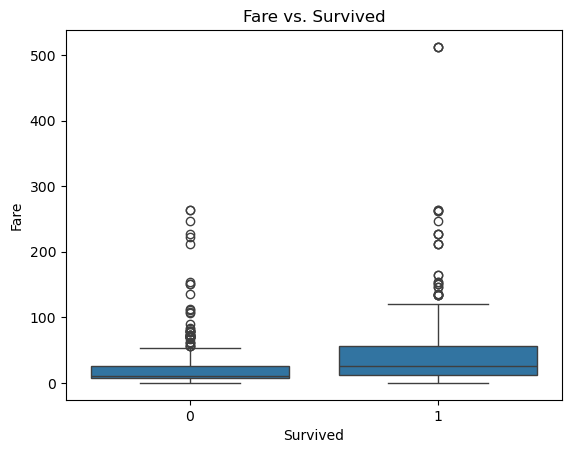

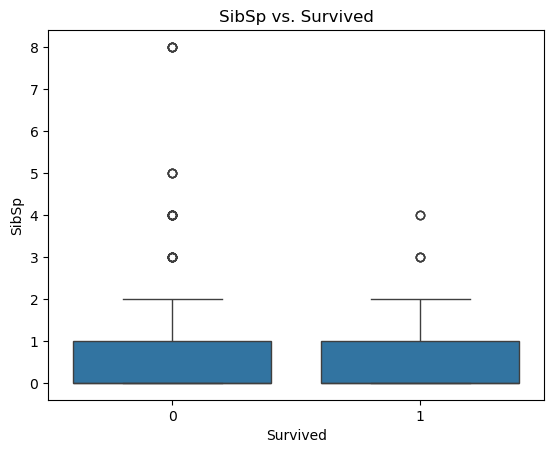

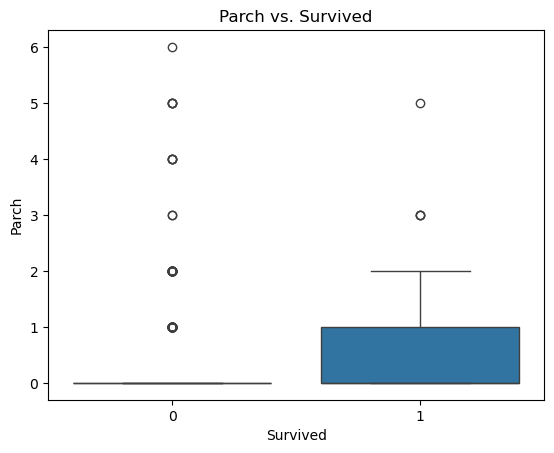

In [17]:
# Box plots for numerical features vs. Survived
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in numerical_features:
    sns.boxplot(x='Survived', y=feature, data=df_train)
    plt.title(f'{feature} vs. Survived')
    plt.show()
    

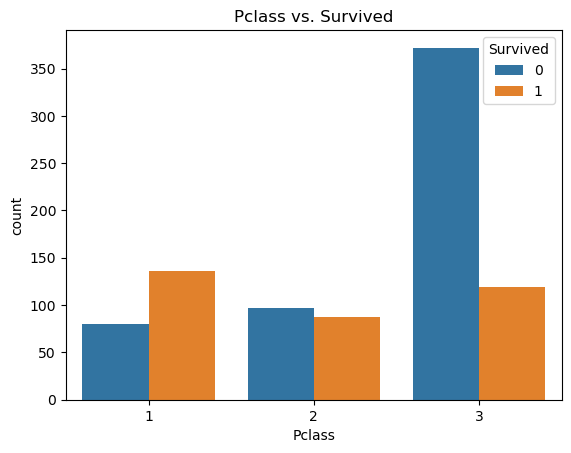

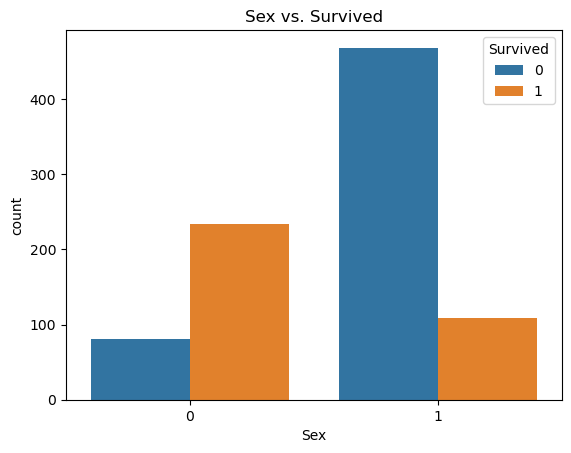

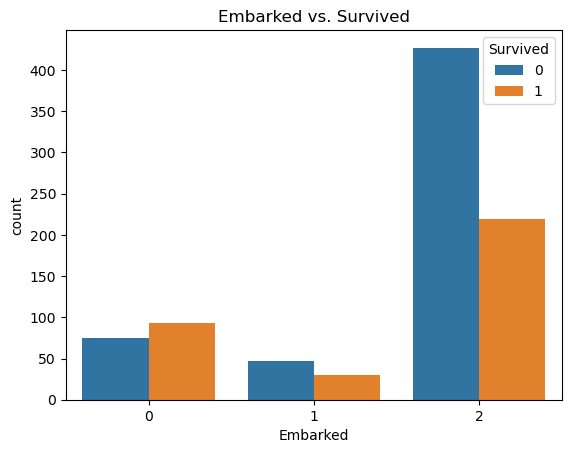

In [18]:
# Count plots for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Survived', data=df_train)
    plt.title(f'{feature} vs. Survived')
    plt.show()


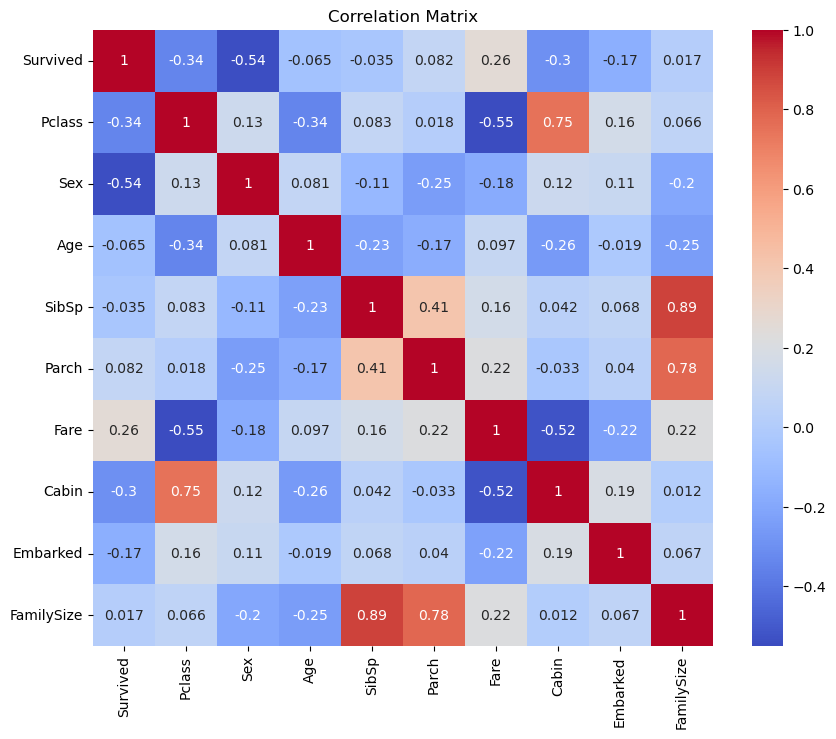

In [19]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Preprocessing for the test set

In [21]:
# Impute missing 'Age' values with the median from the training set
df_test['Age'] = imputer_age_train.transform(df_test[['Age']])

In [22]:
# Impute missing 'Fare' values with the median from the training set
imputer_fare_test = SimpleImputer(strategy='median')
df_test['Fare'] = imputer_fare_test.fit_transform(df_test[['Fare']])

In [23]:
# Impute missing 'Embarked' values with the most frequent value from the training set
df_test['Embarked'] = imputer_embarked_train.transform(df_test[['Embarked']])[:, 0] 

In [24]:
# Handle missing 'Cabin' values by filling with 'Unknown'
df_test['Cabin'].fillna('Unknown', inplace=True)

C:\Users\udits\AppData\Local\Temp\ipykernel_8556\355333548.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Cabin'].fillna('Unknown', inplace=True)


In [25]:
# Encode categorical variables using the training set encoders
df_test['Sex'] = label_encoder_sex_train.transform(df_test['Sex'])
df_test['Embarked'] = label_encoder_embarked_train.transform(df_test['Embarked'])

In [26]:
# Extract the first letter of 'Cabin' (if not 'Unknown')
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df_test['Cabin'] = label_encoder_cabin_train.transform(df_test['Cabin'])


In [27]:
# Feature Engineering (Example: Family Size)
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [28]:
# Drop unnecessary columns
df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [29]:
# Prepare the test data
X_test = df_test

In [30]:
# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
# Make Predictions (No evaluation here)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [32]:
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [46]:
# Evaluation
y_test = df_submission['Survived']
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9258
Precision: 0.8758
Recall: 0.9276
F1-score: 0.9010
ROC-AUC: 0.9791


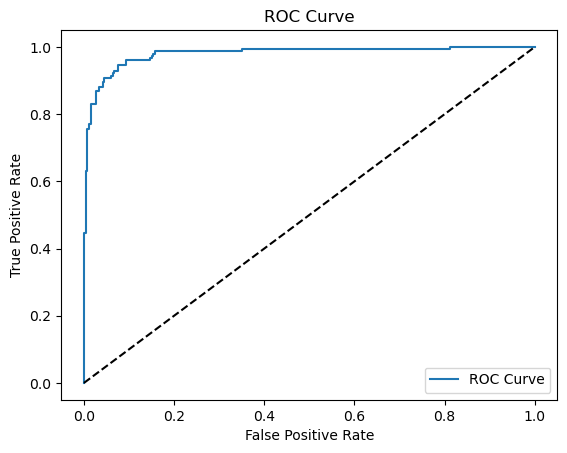

In [47]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [48]:
# Interpretation of Coefficients
coefficients = pd.DataFrame(model.coef_[0], X_train.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)


Coefficients:
            Coefficient
Pclass        -0.882853
Sex           -2.641496
Age           -0.039163
SibSp         -0.180327
Parch          0.047691
Fare           0.001309
Cabin         -0.093765
Embarked      -0.197444
FamilySize    -0.138039


In [50]:
# Significance of Features
print("\nSignificance of Features:")
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: Coefficient = {coef:.2f}")
    if coef > 0:
        print(f"   {feature} has a positive impact on survival probability.")
    else:
        print(f"   {feature} has a negative impact on survival probability.")


Significance of Features:
Pclass: Coefficient = -0.88
   Pclass has a negative impact on survival probability.
Sex: Coefficient = -2.64
   Sex has a negative impact on survival probability.
Age: Coefficient = -0.04
   Age has a negative impact on survival probability.
SibSp: Coefficient = -0.18
   SibSp has a negative impact on survival probability.
Parch: Coefficient = 0.05
   Parch has a positive impact on survival probability.
Fare: Coefficient = 0.00
   Fare has a positive impact on survival probability.
Cabin: Coefficient = -0.09
   Cabin has a negative impact on survival probability.
Embarked: Coefficient = -0.20
   Embarked has a negative impact on survival probability.
FamilySize: Coefficient = -0.14
   FamilySize has a negative impact on survival probability.


### Deployment with Streamlit

In [51]:
import joblib

In [54]:
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

1.  What is the difference between precision and recall?

Precision:

- Precision measures the proportion of correctly predicted positive cases (true positives) out of all cases predicted as positive (true positives + false positives).   
- It answers the question: "Of all the times the model predicted 'yes', how often was it correct?"
- Formula: Precision = True Positives / (True Positives + False Positives)
- High precision means the model is good at avoiding false positives.


Recall (Sensitivity or True Positive Rate):

- Recall measures the proportion of correctly predicted positive cases (true positives) out of all actual positive cases (true positives + false negatives).   
- It answers the question: "Of all the actual 'yes' cases, how many did the model correctly identify?"
- Formula: Recall = True Positives / (True Positives + False Negatives)
- High recall means the model is good at avoiding false negatives.


Key Difference:

- Precision focuses on the accuracy of positive predictions.
- Recall focuses on the completeness of positive predictions.

Example:

Imagine a spam email classifier.

High precision: When the classifier labels an email as spam, it's very likely to be spam.

High recall: The classifier identifies most of the actual spam emails, even if it also flags some legitimate emails as spam.

 2. What is cross-validation, and why is it important in binary classification?

Cross-Validation:

- Cross-validation is a technique used to assess how well a machine learning model generalizes to an independent dataset.   
- It involves partitioning the available data into multiple subsets (folds).   
- The model is trained on some of the folds and tested on the remaining folds.
- This process is repeated multiple times, with different folds used for training and testing each time.
- The performance of the model is then averaged across all the folds.

Importance in Binary Classification:

- Reliable Performance Estimation: It provides a more robust estimate of the model's performance compared to a single train-test split, which might be influenced by the specific data split.
- Reduced Overfitting: It helps detect and mitigate overfitting, where the model performs well on the training data but poorly on unseen data.
- Hyperparameter Tuning: It's often used to select the best hyperparameters for a model.
- Data Efficiency: It makes better use of the available data, especially when the dataset is small.
- Generalization Assessment: It helps to understand how well the model is likely to perform on unseen data in real-world scenarios.

Common Cross-Validation Techniques:

- k-fold cross-validation (most common)
- Stratified k-fold cross-validation (important for imbalanced datasets)
- Leave-one-out cross-validation